In [1]:
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv(r"C:\Users\Aryan\Desktop\DataSets-master\DataSets-master\Bmi_male_female.csv")
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
#data.head()

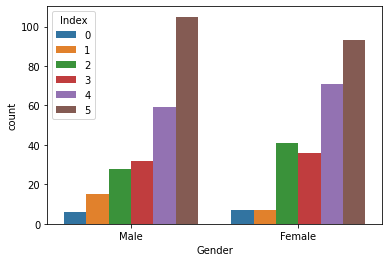

In [4]:
#sb.countplot(x="Gender",data=data)
sb.countplot(x="Gender",data=data,hue="Index")
plt.show()

# feature and target separation


In [5]:
feature=data.iloc[:,0:3]
target=data.iloc[:,3]


In [6]:
print("sample in feature {} and target = {} ".format(feature.shape,target.shape))

sample in feature (500, 3) and target = (500,) 


In [7]:
feature["Gender"]=feature.Gender.map({"Male":0,"Female":1})


In [8]:
feature

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [9]:
n=int(len(feature)*.70)
n

350

In [10]:
xtrain=feature[:n]
xtest=feature[n:]
ytrain=target[:n]
ytest=target[n:]

In [11]:
print("type of xtrain {} ,xtest {}".format(type(xtrain),type(xtest)))
print("type of ytrain {} ,ytest {}".format(type(ytrain),type(ytest)))

type of xtrain <class 'pandas.core.frame.DataFrame'> ,xtest <class 'pandas.core.frame.DataFrame'>
type of ytrain <class 'pandas.core.series.Series'> ,ytest <class 'pandas.core.series.Series'>


In [12]:
xtrain_a=xtrain.values
xtest_a=xtest.values
ytrain_a=ytrain.values
ytest_a=ytest.values

In [13]:
print("type of xtrain_a {} ,xtest_a {}".format(type(xtrain_a),type(xtest_a)))
print("type of ytrain_a {} ,ytest_a {}".format(type(ytrain_a),type(ytest_a)))

type of xtrain_a <class 'numpy.ndarray'> ,xtest_a <class 'numpy.ndarray'>
type of ytrain_a <class 'numpy.ndarray'> ,ytest_a <class 'numpy.ndarray'>


# training the model 


In [14]:
trainer=KNeighborsClassifier(n_neighbors=5)
learner=trainer.fit(xtrain_a,ytrain_a)

In [15]:
id_label = pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])
id_label

0     Extremely Weak
1               Weak
2             Normal
3         Overweight
4            Obesity
5    Extreme Obesity
dtype: object

# Testing the model

In [16]:
r=learner.predict([[0,168,62]])
print("predicted result is {}".format(id_label[r]))

predicted result is 2    Normal
dtype: object


# Accuracy


In [17]:
ya=ytest_a
yp=learner.predict(xtest_a)

In [18]:
ya_list = list(ya)
yp_list = list(yp)
table=pd.DataFrame({"ya":ya_list,"yp":yp_list})
table

,ya,yp
0,2,3
1,2,2
2,2,2
3,5,5
4,0,0
...,...,...
145,5,5
146,4,4
147,5,5
148,5,5


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
acc = accuracy_score(ya,yp)*100
print("Accuracy of the model is {}".format(acc))

Accuracy of the model is 91.33333333333333


# Finding the optimum value of K and max accuracy 


In [21]:
nn = int(np.sqrt(len(feature)))
k = list(range(1,nn))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [26]:
list_acc=[]
for i in range (1,nn):
    knnTrainer=KNeighborsClassifier(n_neighbors=i)
    knnLearner=knnTrainer.fit(xtrain_a,ytrain_a)
    ypkn=knnLearner.predict(xtest_a)
    accknn=accuracy_score(ya,ypkn)
    list_acc.append(accknn)
    print("acc of knn is {} at k = {}".format(accknn,i))
    print(i)
    

acc of knn is 0.8933333333333333 at k = 1
1
acc of knn is 0.9066666666666666 at k = 2
2
acc of knn is 0.8933333333333333 at k = 3
3
acc of knn is 0.9333333333333333 at k = 4
4
acc of knn is 0.9133333333333333 at k = 5
5
acc of knn is 0.9133333333333333 at k = 6
6
acc of knn is 0.9133333333333333 at k = 7
7
acc of knn is 0.9066666666666666 at k = 8
8
acc of knn is 0.92 at k = 9
9
acc of knn is 0.9066666666666666 at k = 10
10
acc of knn is 0.9 at k = 11
11
acc of knn is 0.92 at k = 12
12
acc of knn is 0.9133333333333333 at k = 13
13
acc of knn is 0.92 at k = 14
14
acc of knn is 0.88 at k = 15
15
acc of knn is 0.8933333333333333 at k = 16
16
acc of knn is 0.8933333333333333 at k = 17
17
acc of knn is 0.9066666666666666 at k = 18
18
acc of knn is 0.86 at k = 19
19
acc of knn is 0.8733333333333333 at k = 20
20
acc of knn is 0.8533333333333334 at k = 21
21


In [27]:
list_accArray = np.array(list_acc)
print("max accuracy is {} at k={}".format(list_accArray[list_accArray.argmax()],list_accArray.argmax()))

max accuracy is 0.9333333333333333 at k=3


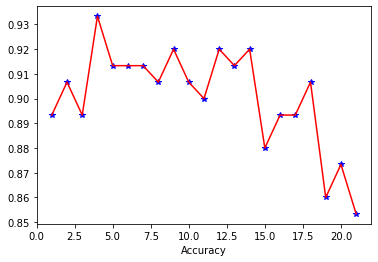

In [28]:
plt.plot(k,list_acc,'b*')
plt.plot(k,list_acc,'r')
plt.xlabel("k...>")
plt.xlabel("Accuracy")
plt.show()

# END